<a href="https://colab.research.google.com/github/esferita006/Probabilidad/blob/main/Arboles_manejo_datos_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h3 align="center"><i>Árboles Binarios de Búsqueda</i></h3>
</font>

<font color="Black" face="Comic Sans MS,arial">
  <p align="justify">
    Un árbol binario de búsqueda (ABB) es una estructura de datos jerárquica en la que cada nodo
    contiene un valor y cumple la propiedad de que todos los valores del subárbol izquierdo son
    menores que el valor del nodo, mientras que todos los valores del subárbol derecho son mayores.
  </p>
</font>


In [7]:
from __future__ import annotations

from dataclasses import dataclass
from typing import Optional, List, Iterable, Any
import graphviz


# =============================================================================
# Árbol Binario de Búsqueda (ABB / BST)
# =============================================================================
# Propiedad BST:
#   - Para cada nodo con valor v:
#       valores en subárbol izquierdo  < v
#       valores en subárbol derecho   >= v   (política de duplicados)
#
# Operaciones:
#   - insertar(valor)
#   - buscar(valor) / contiene(valor)
#   - recorridos: inorden, preorden, postorden
#   - eliminar(valor)
#   - exportar a Graphviz (DOT)
# =============================================================================


@dataclass
class Nodo:
    """
    Nodo de un Árbol Binario de Búsqueda.

    Attributes
    ----------
    valor : Any
        Valor almacenado en el nodo.
    izquierda : Optional[Nodo]
        Hijo izquierdo.
    derecha : Optional[Nodo]
        Hijo derecho.
    _id : int
        Identificador único interno (útil para Graphviz).
    """
    valor: Any
    izquierda: Optional["Nodo"] = None
    derecha: Optional["Nodo"] = None
    _id: int = 0  # se asigna automáticamente desde AB


class AB:
    """
    Implementación de Árbol Binario de Búsqueda (ABB/BST).

    Parameters
    ----------
    valor_raiz : Any, optional
        Si se proporciona, crea el árbol con esa raíz.
    """

    def __init__(self, valor_raiz: Any = None):
        self._next_id = 1
        self.raiz: Optional[Nodo] = None
        if valor_raiz is not None:
            self.raiz = self._nuevo_nodo(valor_raiz)

    # -----------------------------
    # Utilidad interna
    # -----------------------------
    def _nuevo_nodo(self, valor: Any) -> Nodo:
        n = Nodo(valor=valor, _id=self._next_id)
        self._next_id += 1
        return n

    # -----------------------------
    # Inserción
    # -----------------------------
    def insertar(self, valor: Any) -> None:
        """
        Inserta un valor en el ABB.
        Política de duplicados: van al subárbol derecho (>=).
        """
        nuevo = self._nuevo_nodo(valor)

        if self.raiz is None:
            self.raiz = nuevo
            return

        actual = self.raiz
        while True:
            if valor < actual.valor:
                if actual.izquierda is None:
                    actual.izquierda = nuevo
                    return
                actual = actual.izquierda
            else:
                if actual.derecha is None:
                    actual.derecha = nuevo
                    return
                actual = actual.derecha

    # -----------------------------
    # Búsqueda
    # -----------------------------
    def buscar(self, valor: Any) -> Optional[Nodo]:
        """
        Retorna el nodo cuyo valor coincide; si no existe, retorna None.
        """
        actual = self.raiz
        while actual is not None:
            if valor == actual.valor:
                return actual
            actual = actual.izquierda if valor < actual.valor else actual.derecha
        return None

    def contiene(self, valor: Any) -> bool:
        """
        True si el valor existe en el árbol; False en caso contrario.
        """
        return self.buscar(valor) is not None

    # -----------------------------
    # Recorridos (devuelven lista)
    # -----------------------------
    def inorden(self) -> List[Any]:
        """Recorrido inorden (izquierda, raíz, derecha)."""
        res: List[Any] = []
        self._inorden(self.raiz, res)
        return res

    def _inorden(self, nodo: Optional[Nodo], res: List[Any]) -> None:
        if nodo is None:
            return
        self._inorden(nodo.izquierda, res)
        res.append(nodo.valor)
        self._inorden(nodo.derecha, res)

    def preorden(self) -> List[Any]:
        """Recorrido preorden (raíz, izquierda, derecha)."""
        res: List[Any] = []
        self._preorden(self.raiz, res)
        return res

    def _preorden(self, nodo: Optional[Nodo], res: List[Any]) -> None:
        if nodo is None:
            return
        res.append(nodo.valor)
        self._preorden(nodo.izquierda, res)
        self._preorden(nodo.derecha, res)

    def postorden(self) -> List[Any]:
        """Recorrido postorden (izquierda, derecha, raíz)."""
        res: List[Any] = []
        self._postorden(self.raiz, res)
        return res

    def _postorden(self, nodo: Optional[Nodo], res: List[Any]) -> None:
        if nodo is None:
            return
        self._postorden(nodo.izquierda, res)
        self._postorden(nodo.derecha, res)
        res.append(nodo.valor)

    # -----------------------------
    # Mínimo / Máximo / Altura
    # -----------------------------
    def minimo(self) -> Optional[Any]:
        """Valor mínimo del árbol (si existe)."""
        n = self._min_node(self.raiz)
        return n.valor if n else None

    def _min_node(self, nodo: Optional[Nodo]) -> Optional[Nodo]:
        actual = nodo
        while actual and actual.izquierda is not None:
            actual = actual.izquierda
        return actual

    def maximo(self) -> Optional[Any]:
        """Valor máximo del árbol (si existe)."""
        actual = self.raiz
        while actual and actual.derecha is not None:
            actual = actual.derecha
        return actual.valor if actual else None

    def altura(self) -> int:
        """
        Altura del árbol:
          - árbol vacío: 0
          - un nodo: 1
        """
        return self._altura(self.raiz)

    def _altura(self, nodo: Optional[Nodo]) -> int:
        if nodo is None:
            return 0
        return 1 + max(self._altura(nodo.izquierda), self._altura(nodo.derecha))

    # -----------------------------
    # Eliminación
    # -----------------------------
    def eliminar(self, valor: Any) -> None:
        """
        Elimina la primera ocurrencia del valor (si existe).
        """
        self.raiz = self._eliminar(self.raiz, valor)

    def _eliminar(self, nodo: Optional[Nodo], valor: Any) -> Optional[Nodo]:
        if nodo is None:
            return None

        if valor < nodo.valor:
            nodo.izquierda = self._eliminar(nodo.izquierda, valor)
            return nodo
        if valor > nodo.valor:
            nodo.derecha = self._eliminar(nodo.derecha, valor)
            return nodo

        # Caso: encontrado el nodo a eliminar
        # 1) Sin hijo izquierdo
        if nodo.izquierda is None:
            return nodo.derecha
        # 2) Sin hijo derecho
        if nodo.derecha is None:
            return nodo.izquierda

        # 3) Dos hijos: reemplazar por el sucesor (mínimo del subárbol derecho)
        sucesor = self._min_node(nodo.derecha)
        assert sucesor is not None  # por construcción existe
        nodo.valor = sucesor.valor
        # eliminar el sucesor en el subárbol derecho
        nodo.derecha = self._eliminar(nodo.derecha, sucesor.valor)
        return nodo

    # -----------------------------
    # Graphviz
    # -----------------------------
    def to_graphviz(self) -> graphviz.Digraph:
        """
        Genera un objeto graphviz.Digraph del árbol.
        Usa IDs únicos para evitar colisiones si hay valores repetidos.
        """
        dot = graphviz.Digraph(comment="Árbol Binario de Búsqueda")
        dot.attr("node", shape="circle")
        self._add_nodes(dot, self.raiz)
        return dot

    def _add_nodes(self, dot: graphviz.Digraph, nodo: Optional[Nodo]) -> None:
        if nodo is None:
            return

        node_id = str(nodo._id)
        dot.node(node_id, label=str(nodo.valor))

        if nodo.izquierda is not None:
            left_id = str(nodo.izquierda._id)
            dot.edge(node_id, left_id, label="L")
            self._add_nodes(dot, nodo.izquierda)

        if nodo.derecha is not None:
            right_id = str(nodo.derecha._id)
            dot.edge(node_id, right_id, label="R")
            self._add_nodes(dot, nodo.derecha)


# =============================================================================
# Ejemplo de uso
# =============================================================================
def main():
    ab = AB(15)
    elementos = [10, 20, 8, 14, 0, 35, 99, 30, 90]
    for e in elementos:
        ab.insertar(e)

    print("Inorden   :", ab.inorden())
    print("Preorden  :", ab.preorden())
    print("Postorden :", ab.postorden())
    print("Mínimo    :", ab.minimo())
    print("Máximo    :", ab.maximo())
    print("Altura    :", ab.altura())

    # Eliminar un valor
    ab.eliminar(20)
    print("\nDespués de eliminar 20:")
    print("Inorden   :", ab.inorden())

    # Exportar a Graphviz (archivo abb.pdf / abb.png según tu instalación)
    dot = ab.to_graphviz()
    dot.render("abb", format="pdf", view=False)  # pon view=True si quieres abrirlo automáticamente


if __name__ == "__main__":
    main()


Inorden   : [0, 8, 10, 14, 15, 20, 30, 35, 90, 99]
Preorden  : [15, 10, 8, 0, 14, 20, 35, 30, 99, 90]
Postorden : [0, 8, 14, 10, 30, 90, 99, 35, 20, 15]
Mínimo    : 0
Máximo    : 99
Altura    : 5

Después de eliminar 20:
Inorden   : [0, 8, 10, 14, 15, 30, 35, 90, 99]


![image.png](https://compilandoconocimiento.com/wp-content/uploads/2017/01/busqueda.gif?w=275&h=206)

<font color="Teal" face="Comic Sans MS,arial">
  <h3 align="center"><i>Árbol Binario Balanceado</i></h3>
</font>

<font color="Black" face="Comic Sans MS,arial">
  <p align="justify">
    Un árbol binario balanceado es un tipo de árbol binario en el que la diferencia de alturas
    entre los subárboles izquierdo y derecho de cualquier nodo es pequeña (generalmente menor o
    igual a 1). Esta propiedad garantiza que las operaciones de búsqueda, inserción y eliminación
    se realicen de manera eficiente.
  </p>
</font>


In [8]:
from __future__ import annotations

from dataclasses import dataclass
from typing import Optional, List, Any, Callable
import random

import warnings
warnings.filterwarnings("ignore", category=SyntaxWarning)



# =============================================================================
# Nodo (único para todos los árboles)
# =============================================================================

@dataclass
class Nodo:
    dato: Any
    izq: Optional["Nodo"] = None
    der: Optional["Nodo"] = None
    padre: Optional["Nodo"] = None
    altura: int = 1  # usado principalmente en AVL; en AB/ABB no estorba

    def es_izq(self) -> bool:
        return self.padre is not None and self.padre.izq is self

    def es_der(self) -> bool:
        return self.padre is not None and self.padre.der is self

    def __str__(self) -> str:
        return str(self.dato)


# =============================================================================
# Árbol Binario (AB) - inserción sin orden (aleatoria)
# =============================================================================

class ArbolBinario:
    """
    Árbol binario general (sin propiedad de búsqueda).
    Inserta en un lado aleatorio, como tu implementación original.
    """

    def __init__(self, dato_raiz: Any):
        self.raiz = Nodo(dato_raiz)

    def elimina(self) -> None:
        self.raiz = None

    def nivel(self, nodo: Optional[Nodo]) -> int:
        """Nivel del nodo (raíz=0). Si nodo=None retorna -1."""
        lvl = -1
        while nodo is not None:
            lvl += 1
            nodo = nodo.padre
        return lvl

    def altura(self, nodo: Optional[Nodo]) -> int:
        """
        Altura (en AB sin mantenimiento de alturas):
          - None -> 0
          - hoja -> 1
        """
        if nodo is None:
            return 0
        return 1 + max(self.altura(nodo.izq), self.altura(nodo.der))

    def insertar(self, dato: Any) -> None:
        """Inserta un dato bajando aleatoriamente por izq/der hasta encontrar hueco."""
        if self.raiz is None:
            self.raiz = Nodo(dato)
            return

        actual = self.raiz
        while True:
            go_left = bool(random.getrandbits(1))
            if go_left:
                if actual.izq is None:
                    actual.izq = Nodo(dato, padre=actual)
                    return
                actual = actual.izq
            else:
                if actual.der is None:
                    actual.der = Nodo(dato, padre=actual)
                    return
                actual = actual.der

    # Recorridos (devuelven lista)
    def inorden(self) -> List[Any]:
        res: List[Any] = []
        self._inorden(self.raiz, res)
        return res

    def _inorden(self, nodo: Optional[Nodo], res: List[Any]) -> None:
        if nodo is None:
            return
        self._inorden(nodo.izq, res)
        res.append(nodo.dato)
        self._inorden(nodo.der, res)

    def preorden(self) -> List[Any]:
        res: List[Any] = []
        self._preorden(self.raiz, res)
        return res

    def _preorden(self, nodo: Optional[Nodo], res: List[Any]) -> None:
        if nodo is None:
            return
        res.append(nodo.dato)
        self._preorden(nodo.izq, res)
        self._preorden(nodo.der, res)

    def postorden(self) -> List[Any]:
        res: List[Any] = []
        self._postorden(self.raiz, res)
        return res

    def _postorden(self, nodo: Optional[Nodo], res: List[Any]) -> None:
        if nodo is None:
            return
        self._postorden(nodo.izq, res)
        self._postorden(nodo.der, res)
        res.append(nodo.dato)


# =============================================================================
# ABB (Árbol Binario de Búsqueda / BST)
# =============================================================================

class ABB(ArbolBinario):
    """
    Árbol Binario de Búsqueda (BST):
      - izq < dato
      - der > dato
    Política de duplicados:
      - por simplicidad, NO insertamos duplicados (como tu ABB).
    """

    def __init__(self, dato_raiz: Any):
        super().__init__(dato_raiz)
        self.ultimo_agregado: Optional[Nodo] = self.raiz

    def buscar(self, dato: Any) -> Optional[Nodo]:
        actual = self.raiz
        while actual is not None:
            if dato == actual.dato:
                return actual
            actual = actual.izq if dato < actual.dato else actual.der
        return None

    def insertar(self, dato: Any) -> None:
        # No duplicados
        if self.raiz is None:
            self.raiz = Nodo(dato)
            self.ultimo_agregado = self.raiz
            return
        if self.buscar(dato) is not None:
            return

        actual = self.raiz
        padre = None
        while actual is not None:
            padre = actual
            actual = actual.izq if dato < actual.dato else actual.der

        nuevo = Nodo(dato, padre=padre)
        if dato < padre.dato:
            padre.izq = nuevo
        else:
            padre.der = nuevo
        self.ultimo_agregado = nuevo

    def minimo_en_subarbol(self, nodo: Optional[Nodo]) -> Optional[Nodo]:
        actual = nodo
        while actual is not None and actual.izq is not None:
            actual = actual.izq
        return actual

    def eliminar(self, dato: Any) -> None:
        """Elimina dato si existe."""
        self.raiz = self._eliminar_rec(self.raiz, dato)
        if self.raiz is not None:
            self.raiz.padre = None

    def _eliminar_rec(self, nodo: Optional[Nodo], dato: Any) -> Optional[Nodo]:
        if nodo is None:
            return None

        if dato < nodo.dato:
            nodo.izq = self._eliminar_rec(nodo.izq, dato)
            if nodo.izq is not None:
                nodo.izq.padre = nodo
            return nodo

        if dato > nodo.dato:
            nodo.der = self._eliminar_rec(nodo.der, dato)
            if nodo.der is not None:
                nodo.der.padre = nodo
            return nodo

        # Encontrado
        if nodo.izq is None:
            hijo = nodo.der
            if hijo is not None:
                hijo.padre = nodo.padre
            return hijo

        if nodo.der is None:
            hijo = nodo.izq
            if hijo is not None:
                hijo.padre = nodo.padre
            return hijo

        # Dos hijos: sucesor (mínimo del subárbol derecho)
        succ = self.minimo_en_subarbol(nodo.der)
        assert succ is not None
        nodo.dato = succ.dato
        nodo.der = self._eliminar_rec(nodo.der, succ.dato)
        if nodo.der is not None:
            nodo.der.padre = nodo
        return nodo


# =============================================================================
# AVL (BST auto-balanceado) - optimizado con alturas por nodo
# =============================================================================

class AVL(ABB):
    """
    AVL: BST con balanceo automático.
    Mantiene altura en cada nodo para que inserción/eliminación sean O(log n).
    """

    # -----------------------------
    # Helpers de altura y balance
    # -----------------------------
    @staticmethod
    def _h(n: Optional[Nodo]) -> int:
        return n.altura if n is not None else 0

    @staticmethod
    def _actualizar_altura(n: Nodo) -> None:
        n.altura = 1 + max(AVL._h(n.izq), AVL._h(n.der))

    @staticmethod
    def _balance(n: Optional[Nodo]) -> int:
        # factor = altura(der) - altura(izq)
        if n is None:
            return 0
        return AVL._h(n.der) - AVL._h(n.izq)

    # -----------------------------
    # Rotaciones
    # -----------------------------
    def _rot_izq(self, x: Nodo) -> Nodo:
        """
        Rotación simple izquierda:
            x              y
             \            / \
              y    =>    x  (T3)
             / \          \
           (T2)(T3)       (T2)
        """
        y = x.der
        assert y is not None
        T2 = y.izq

        # rotar
        y.izq = x
        x.der = T2

        # padres
        y.padre = x.padre
        x.padre = y
        if T2 is not None:
            T2.padre = x

        # conectar con el padre original
        if y.padre is None:
            self.raiz = y
        else:
            if y.es_izq():
                y.padre.izq = y
            else:
                y.padre.der = y

        # actualizar alturas
        self._actualizar_altura(x)
        self._actualizar_altura(y)
        return y

    def _rot_der(self, y: Nodo) -> Nodo:
        """
        Rotación simple derecha:
              y            x
             /            / \
            x     =>   (T1) y
           / \              /
        (T1)(T2)          (T2)
        """
        x = y.izq
        assert x is not None
        T2 = x.der

        # rotar
        x.der = y
        y.izq = T2

        # padres
        x.padre = y.padre
        y.padre = x
        if T2 is not None:
            T2.padre = y

        # conectar con el padre original
        if x.padre is None:
            self.raiz = x
        else:
            if x.es_izq():
                x.padre.izq = x
            else:
                x.padre.der = x

        # actualizar alturas
        self._actualizar_altura(y)
        self._actualizar_altura(x)
        return x

    def _rebalance(self, n: Nodo) -> None:
        """
        Rebalancea desde n hacia la raíz.
        """
        actual = n
        while actual is not None:
            self._actualizar_altura(actual)
            bf = self._balance(actual)

            # Izq pesado: bf = -2
            if bf == -2:
                # Si el hijo izq está cargado a la derecha, rotación doble (izq-der)
                if self._balance(actual.izq) > 0:
                    self._rot_izq(actual.izq)  # primero rotación en hijo
                actual = self._rot_der(actual)
            # Der pesado: bf = +2
            elif bf == 2:
                # Si el hijo der está cargado a la izquierda, rotación doble (der-izq)
                if self._balance(actual.der) < 0:
                    self._rot_der(actual.der)
                actual = self._rot_izq(actual)

            # subir
            actual = actual.padre

    # -----------------------------
    # Inserción AVL
    # -----------------------------
    def insertar(self, dato: Any) -> None:
        if self.raiz is None:
            self.raiz = Nodo(dato)
            self.ultimo_agregado = self.raiz
            return
        if self.buscar(dato) is not None:
            return

        # inserción BST iterativa
        actual = self.raiz
        padre = None
        while actual is not None:
            padre = actual
            actual = actual.izq if dato < actual.dato else actual.der

        nuevo = Nodo(dato, padre=padre)
        if dato < padre.dato:
            padre.izq = nuevo
        else:
            padre.der = nuevo

        self.ultimo_agregado = nuevo
        # rebalanceo desde el padre del nuevo nodo
        self._rebalance(nuevo.padre)

    # -----------------------------
    # Eliminación AVL
    # -----------------------------
    def eliminar(self, dato: Any) -> None:
        """
        Elimina y rebalancea. Para simplicidad, hacemos eliminación BST recursiva
        y luego rebalanceo desde la zona afectada.
        """
        nodo = self.buscar(dato)
        if nodo is None:
            return

        padre_afectado = nodo.padre
        self.raiz = self._eliminar_rec(self.raiz, dato)
        if self.raiz is not None:
            self.raiz.padre = None

        # rebalanceo desde el padre afectado (si existe), si no, desde la raíz
        if padre_afectado is not None:
            self._rebalance(padre_afectado)
        elif self.raiz is not None:
            self._rebalance(self.raiz)


# =============================================================================
# Ejemplo de uso
# =============================================================================

def main():
    datos = [15, 10, 20, 8, 14, 0, 35, 99, 30, 90]

    print("=== ABB ===")
    abb = ABB(15)
    for x in datos[1:]:
        abb.insertar(x)
    print("Inorden  :", abb.inorden())
    abb.eliminar(20)
    print("Inorden (sin 20):", abb.inorden())

    print("\n=== AVL ===")
    avl = AVL(15)
    for x in datos[1:]:
        avl.insertar(x)
    print("Inorden  :", avl.inorden())
    avl.eliminar(20)
    print("Inorden (sin 20):", avl.inorden())


if __name__ == "__main__":
    main()


=== ABB ===
Inorden  : [0, 8, 10, 14, 15, 20, 30, 35, 90, 99]
Inorden (sin 20): [0, 8, 10, 14, 15, 30, 35, 90, 99]

=== AVL ===
Inorden  : [0, 8, 10, 14, 15, 20, 30, 35, 90, 99]
Inorden (sin 20): [0, 8, 10, 14, 15, 30, 35, 90, 99]


<font color="Teal" face="Comic Sans MS,arial">
  <h3 align="center"><i>Creación del árbol balanceado</i></h3>
</font>

<font color="Black" face="Comic Sans MS,arial">
  <p align="justify">
    La creación de un árbol binario balanceado consiste en construir la estructura de manera que
    la altura de sus subárboles se mantenga lo más equilibrada posible. Esto puede lograrse
    insertando los elementos en un orden adecuado o utilizando algoritmos de balanceo que, tras
    cada inserción o eliminación, reorganizan el árbol para conservar el equilibrio.
  </p>
</font>


<font color="Teal" face="Comic Sans MS,arial">
  <h3 align="center"><i>Inserción de nodos en un árbol AAVL</i></h3>
</font>

<font color="Black" face="Comic Sans MS,arial">
  <p align="justify">
    Para este árbol, que será un <b>AAVL</b>, se insertarán los siguientes nodos:
  </p>

  <p align="center">
    $[15,\,10,\,5,\,16,\,17,\,9,\,20]$
  </p>

  <p align="justify">
    Para ello definiremos la <code>clase AAVL</code>, la cual contendrá los métodos (sobrecargados o
    extendidos) de un <b>ABB</b> y la clase <code>Nodo</code>, tales como:
    <b>crear árbol</b>, <b>insertar</b>, <b>eliminar</b> y <b>búsqueda</b>.
  </p>
</font>


<font color="Teal" face="Comic Sans MS,arial">
  <h3 align="center"><i>Cronología</i></h3>
</font>

<font color="Black" face="Comic Sans MS,arial">
  <ol>
    <li>
      Se crea el árbol con raíz <b>15</b>.
    </li>
  </ol>
</font>


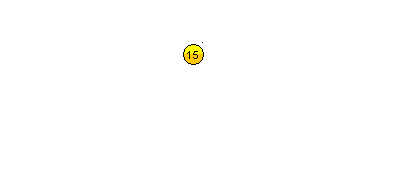

<font color="Black" face="Comic Sans MS,arial">
  <ol start="2">
    <li>
      Se inserta <code>nodo = 10</code>, que será hijo izquierdo de la raíz.
      Se verifica si el árbol se desbalancea; como no es el caso, se puede seguir insertando.
    </li>
  </ol>
</font>


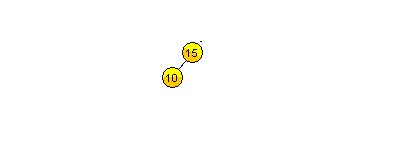

3. Se inserta `nodo=5`; que es `raiz.izq.izq`. Notamos que el árbol queda desbalanceado, por lo que revisando los casos requiere solo una rotación simple a la derecha, donde ahora la raiz del arbol es $10$

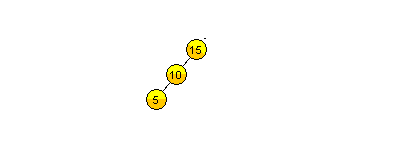

Rotación simple a la derecha

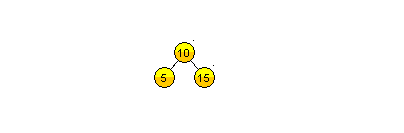

4. Insetamos `nodo=16`, de tal manera que es hijo derecho de $15$. Revisamos en los padres del `nodo=16` y checamos que esté balanceado el árbol. No se desbalancea entonces continuamos.

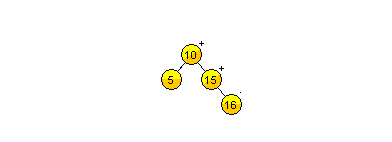

5. Insertamos `nodo=17`, de tal manera que es hijo derecho de `nodo=16`. Checamos en los padres del nodo insertado si hay un desbalanceo. Notamos que el arbol está desbalanceado, por lo que hacemos un rotación simple a la izquierda tomando como referencia a `nodo=16`. Entonces el arbol está balanceado.

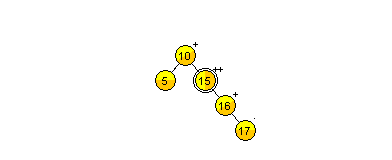

Rotación simple a la izquierda

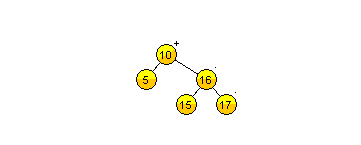

6. Insertamos `nodo=9`, de tal manera que es hijo derecho de `nodo=5`. Checamos los padres del nodo insertado verificando si hay un desbalanceo. El árbol no se delbalancea entonces continuamos.

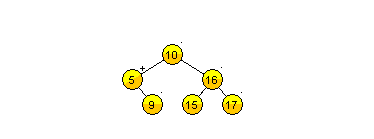

7. Insertamos `nodo=20`, de tal manera que es hijo derecho del `nodo=17`. Checamos los padres del nodo insertado verificando si hay un desbalanceo. Como el árbol no está desbalanceado entonces concluimos, el árbol final se ve como sigue

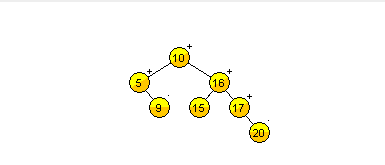

In [ ]:
#Creación del árbol
aavl = ArbolAVL(10)

#insetamos valores
aavl.insertar(15)
aavl.insertar(10)
aavl.insertar(5)
aavl.insertar(16)
aavl.insertar(17)
aavl.insertar(9)
aavl.insertar(20)

## Eliminar `nodo9`

1. Primero buscamos el nodo en el árbol. Como se localizó revisamos los casos para poder eliminar los nodos.

Notamos que como el nodo a eliminar es una hoja se puede eliminar con normalidad.

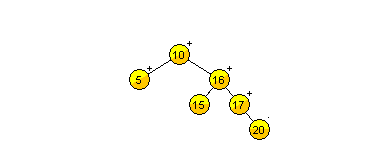

2. Ahora desde la posición donde se eliminó el nodo, verificamos con los padres si se desbalanceó el árbol. El arbol está desbalanceado, desde el `nodo10` realizamos una rotación a la izquierda y la hoja `nodo15` pasa a ser hijo derecho de `nodo10`.

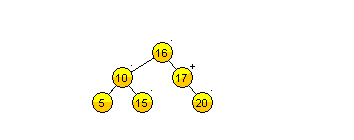

In [ ]:
#borramos nodo9
aavl.borra(9)

## Eliminar `nodo16`

1. Primero buscamos al nodo, y para nuestra suerte está en la raíz. Ahora notemos que tiene hijos izquierdos y derechos, por lo que en lugar del `nodo16` pasa a su lugar su hijo derecho más cercano, en este caso `nodo17`.


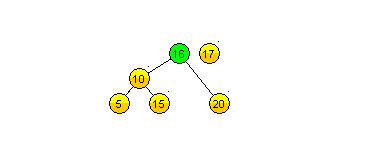

2. Como no existe desbalanceo en el árbol se sigue a la siguiente instrucción

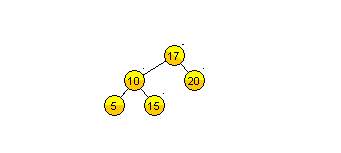

In [ ]:
#borramos nodo16
aavl.borra(16)

## Insertar `nodo1`

1. Para insertar un nodo se sigue el mismo proceso para cualquier ABB, hacemos las comparaciones para poder localizar la posición del `nodo1`. Notemos que un posición queda como hijo izquierdo de `nodo5`.

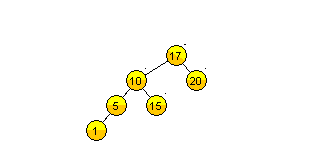

2. Checamos los padres de `nodo1` para verificar si hay un desbalanceo. Llegando al `nodo17` notamos que hay un desbalanceo, por lo que hacemos una rotación a la izquierda, `nodo15` queda libre momentaneamente, `nodo10` pasa a ser la raíz del árbol y `nodo15` pasa a ser hijo izquierdo de `nodo17`

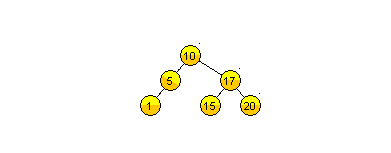

In [ ]:
#insertamos nodo1
aavl.insertar(1)

## Recorridos

**Recorrido en orden**

In [ ]:
print("Dado el último árbol, su recorrido en orden es:")
aavl.recorrido_enorden(aavl.raiz)

**Recorrido en pre-orden**

In [ ]:
print("Dado el último árbol, su recorrido en pre-orden es:")
aavl.recorrido_preorden(aavl.raiz)

Dado el último árbol, su recorrido en pre-orden es:
10
5
1
17
15
20


**Recorrido en post-orden**

In [ ]:
print("Dado el último árbol, su recorrido en post-orden es:")
aavl.recorrido_postorden(aavl.raiz)

Dado el último árbol, su recorrido en post-orden es:
1
5
15
20
17
10


## Análisis

Para facilitar la descripción del tiempo de ejecución de los diferentes métodos tomemos un AAVL aleatorio y en base a el expliquemos

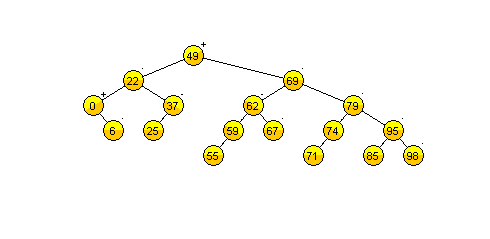

Desde ahora mencionaremos algo fundamental para hacer el estudio de los AAVL, pues **No existe un peor caso para estos árboles** y esto se debe a que cada vez que se realiza una operación, este revisa constantemente que esté balanceado, lo cual impide contundentemente manejar un caso ajeno al común.

`eliminar_arbol`

Notemos que para cualquier tipo de árbol; de los cuales ya hemos hablado: AB, ABB, AAVL; la forma en la que se elimina un arbol es asignándole un valor `nule` a la raíz del arbol, por lo que esto tiene un tiempo de ejecución constante $a$.

Entonces, sea $T(n)$ el tiempo de ejecusión de `eliminar_arbol`, decimos que $T(n) \in O(c)$, es decir pertenece al orden constante.

`buscar`

Como se mencionó arriba no existe un peor caso para los AAVL, por lo que tomemos de referencia el árbol propuesto y busquemos un `nodo` que sea hoja, por ejemplo `nodo55`

1. Definamos el tiempo que toma encontrar al `nodo55` que está en un `nivel n` del árbol como

$$T(n)=\begin{cases}
b & si \ nodo \ no \ tiene \ hijos\\
T(\frac{n}{2})+a & si \ nodo \ tiene \ por \ lo \ menos \ un \ hijo
\end{cases} $$

como tenemos un AAVL, cada vez que bajemos de nivel se usa la restricción $T(\frac{n}{2})+a$, así que empecemos

Sea $n = 2^k$ entonces
$$ T(2^k)=T\left(\dfrac{2^k}{2} \right)+a$$
$$ =T(2^{k-1})+a$$
$$ =\left[T\left(\dfrac{2^{k-1}}{2} \right)+a \right] +a$$
$$ =T(2^{k-2}) +2a$$
$$ =\left[T\left(\dfrac{2^{k-2}}{2} \right)+a \right] +2a$$
$$ =T(2^{k-3}) +3a$$

Si repetimos el proceso $i-veces$

$$ =T(2^{k-i}) +ia$$

Ahora si $i=k$

$$ =T(2^{k-k}) +ka$$
$$ =T(2^0) +ka$$
$$ =T(1) +ka$$
$$ =b+ka$$

Donde $k=log_2 n$ entonces

$$T(n)=b+log_2 n \cdot a$$

Notemos que la función $a \cdot log_2 n$ crece más rapido que $b$, por lo que nos enfocamos en ella.

Usando la definición de Cota Superior Asintótica, tenemos que $c=a \ \ x_0 =1 \ \ g(x)=log_2 x$ entonces:

$$\forall x \in \mathbb{R} \ \ t.q. \ \ 0 \leq x_0 \leq x \ se \ cumple \ \ | T(x) | \leq | cg(x) | $$

Por lo tanto, $T(n) \in O(log_2 n)$, es decir que $T(n)$ pertenece al orden $log_2 n$

`insertar` y `borrar_nodo`

Notemos que ha estás alturas ya tenemos prácticamente definido el orden de estos 2 métodos, pues ellos descansan prenamente en el método `busqueda`. Lo que nos interesa estudiar ahora es que pasa si el árbol queda desbalanceado.

Veamos que para verificar si se desbalancea el árbol se usa el método `factor_equilibrio`, `balanceo`, `rotaciones` $\in O(c)$ entonces la suma de ellos nos da lo siguiente:

Sea $T(n)$ el tiempo de ejecución de los métodos `insertar` y `borrar_nodo`, $c_1,c_2,a,b \in \mathbb{R}$ entonces:

$$T(n)=b+ log_2 n \cdot a + c_1 + c_2 $$
Sea $c=c_1+c_2+a+b$ entonces

$$T(n)=c+log_2 n$$

Como la función que crece más rapido es $log_2 n$ nos enfocamos en estudiar a ella.

Usando la definición de Cota Superior Asintótica, tenemos que $c'=c \ \ x_0 =1 \ \ g(x)=log_2 x$ entonces:

$$\forall x \in \mathbb{R} \ \ t.q. \ \ 0 \leq x_0 \leq x \ se \ cumple \ \ | T(x) | \leq | c'g(x) | $$

Por lo tanto, $T(n) \in O(log_2 n)$, es decir que $T(n)$ pertenece al orden $log_2 n$


# Tablas Hash

Importamos el documento de donde vamos a generar el diccionario

In [ ]:
!wget https://raw.githubusercontent.com/jugernaut/ManejoDatos/desarrollo/utils/inteligencia.txt

--2023-03-18 05:42:48--  https://raw.githubusercontent.com/jugernaut/ManejoDatos/desarrollo/utils/inteligencia.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3439 (3.4K) [text/plain]
Saving to: ‘inteligencia.txt’

inteligencia.txt    100%[===================>]   3.36K  --.-KB/s    in 0s      

2023-03-18 05:42:48 (61.6 MB/s) - ‘inteligencia.txt’ saved [3439/3439]



In [ ]:
#Librerías a utilizar
import re
from collections import Counter

#Creamos una variable con el documento
documento = open("inteligencia.txt")

#leemos el documento y lo guardamos
archivo = documento.read()

archivo_limpio = ""

#quitamos espacios
archivo_limpio = re.split('\s+', archivo)
archivo = archivo_limpio

#creamos el diccionario
diccionario = {}

for palabra in archivo_limpio:
  '''cada vez que se encuentre una palabra se agrega al diccionario y se va
  contando, si no está entonces devuelve cero'''
  diccionario[palabra] = diccionario.get(palabra, 0) + 1

#imprimimos el diccionario sin ordenar
print("Diccionario sin ordenar")
print(diccionario)

Diccionario sin ordenar
{'Ahora': 1, 'que': 17, 'ya': 1, 'conoce': 1, 'la': 14, 'definición': 1, 'de': 51, 'IA': 2, 'y': 12, 'más': 2, 'su': 4, 'historia,': 1, 'mejor': 1, 'forma': 1, 'profundizar': 1, 'en': 15, 'el': 9, 'tema': 1, 'es': 5, 'conocer': 1, 'las': 5, 'principales': 1, 'técnicas': 1, 'IA,': 1, 'específicamente,': 1, 'los': 10, 'casos': 2, 'Inteligencia': 1, 'artificial': 1, 'se': 9, 'utiliza': 2, 'para': 6, 'negocios.': 1, 'Aprendizaje': 10, 'automático': 6, 'Generalmente,': 1, 'concepto': 3, 'confunde': 1, 'con': 3, '“IA': 1, 'débil”.': 1, 'Es': 3, 'este': 1, 'campo': 1, 'donde': 1, 'avances': 1, 'importantes': 1, 'están': 2, 'llevando': 1, 'a': 4, 'cabo.': 1, 'En': 1, 'términos': 1, 'prácticos,': 1, '“el': 1, 'ciencia': 1, 'encarga': 1, 'hacer': 2, 'computadoras': 1, 'realicen': 1, 'acciones': 1, 'sin': 1, 'necesidad': 1, 'programación': 1, 'explícita”.': 1, 'La': 3, 'idea': 2, 'principal': 2, 'aquí': 1, 'les': 1, 'puede': 2, 'proporcionar': 1, 'datos': 3, 'algoritmos': 

In [ ]:
#iterable con proposiciones y pronombres
quitar = ['a',
 'ante',
 'bajo',
 'cabe',
 'con',
 'contra',
 'de',
 'desde',
 'en',
 'entre',
 'hacia',
 'hasta',
 'para',
 'por',
 'según',
 'sin',
 'so',
 'sobre',
 'tras',
 'yo',
 'mi',
 'me',
 'contigo',
 'tú',
 'ti',
 'te',
 'conmigo',
 'el',
 'ella',
 'ello',
 'le',
 'lo',
 'la',
 'consigo',
 'nosotros',
 'nosotras',
 'nos',
 'ustedes',
 'ellos',
 'ellas',
 'les',
 'los',
 'las',
 'consigo',
 'su',
 'se',
 'este',
 'que',
 'y',
 'un',
 'es',
 'una',
 'es',
 'La',
 'El',
 'Los',
 'Las',
 'Es']

In [ ]:
'''quitamos las llaves que sean pronombres y articulos con la función pop y
devolvemos None si la llave no la encuentra'''
for llave in quitar:
  diccionario.pop(llave, None)

#imprimimos el resultado
print("Diccionario sin ordenar")
print(diccionario)

#Ahora lo ordenamos
contador = Counter(diccionario)
diccionarioOrdenado = contador.most_common()

#Finamente imprimimos el diccionario ordenado
print("Diccionario Ordenado")
print(diccionarioOrdenado)

Diccionario sin ordenar
{'Ahora': 1, 'ya': 1, 'conoce': 1, 'definición': 1, 'IA': 2, 'más': 2, 'historia,': 1, 'mejor': 1, 'forma': 1, 'profundizar': 1, 'tema': 1, 'conocer': 1, 'principales': 1, 'técnicas': 1, 'IA,': 1, 'específicamente,': 1, 'casos': 2, 'Inteligencia': 1, 'artificial': 1, 'utiliza': 2, 'negocios.': 1, 'Aprendizaje': 10, 'automático': 6, 'Generalmente,': 1, 'concepto': 3, 'confunde': 1, '“IA': 1, 'débil”.': 1, 'campo': 1, 'donde': 1, 'avances': 1, 'importantes': 1, 'están': 2, 'llevando': 1, 'cabo.': 1, 'En': 1, 'términos': 1, 'prácticos,': 1, '“el': 1, 'ciencia': 1, 'encarga': 1, 'hacer': 2, 'computadoras': 1, 'realicen': 1, 'acciones': 1, 'necesidad': 1, 'programación': 1, 'explícita”.': 1, 'idea': 2, 'principal': 2, 'aquí': 1, 'puede': 2, 'proporcionar': 1, 'datos': 3, 'algoritmos': 4, 'luego': 1, 'usarlos': 1, 'saber': 1, 'cómo': 1, 'predicciones': 1, 'o': 3, 'guiar': 1, 'decisiones.': 1, 'Algunos': 2, 'ejemplos': 2, 'incluyen': 1, 'siguientes:': 2, 'diagramas': 1

## De que trató el texto

Ahora analicemos cual fue la palabra que más se repite, para ello es muy sensello haberiguar, ya que en la sección anterior obtuvimos el diccionario ordenado de mayor a menor con las palabras del texto **sin tomar en cuenta preposiciones, pronombres y conjunciones**

In [ ]:
diccionarioOrdenado[0]

('Aprendizaje', 10)

#ARBOLES DE LA BARRANCA

##ARBOL BST
Un árbol binario de búsqueda (BST, por sus siglas en inglés) es una estructura de datos jerárquica en la que cada nodo tiene como máximo dos hijos, y los valores de los nodos en el subárbol izquierdo son menores que el valor del nodo padre, mientras que los valores de los nodos en el subárbol derecho son mayores que el valor del nodo padre.

>**Algunas de las ventajas del árbol BST son:**

>>Búsqueda eficiente: La búsqueda en un árbol BST se realiza en tiempo logarítmico, lo que significa que la cantidad de operaciones necesarias para buscar un elemento en el árbol es proporcional al logaritmo del número de nodos del árbol.

>>Inserción y eliminación eficientes: La inserción y eliminación en un árbol BST también se realizan en tiempo logarítmico, siempre y cuando el árbol esté equilibrado.

>>Ordenación: Los elementos de un árbol BST se pueden recorrer en orden ascendente o descendente, lo que permite ordenar los elementos almacenados en el árbol.

>**El árbol BST se utiliza en una gran variedad de aplicaciones, como por ejemplo:**

>>Búsqueda de elementos en una base de datos: Los árboles BST se utilizan en muchas bases de datos para buscar rápidamente los registros que coinciden con ciertos criterios.

>>Implementación de diccionarios: Los diccionarios que se utilizan en muchos lenguajes de programación, como Python, se implementan utilizando árboles BST.

>>Algoritmos de compresión de datos: Los árboles BST se utilizan en algunos algoritmos de compresión de datos, como el algoritmo de Huffman.

>>Árboles AVL: Los árboles AVL son una variante del árbol BST que se utilizan para garantizar un tiempo de búsqueda y actualización de nodos más equilibrado, y se usan en aplicaciones que requieren una alta eficiencia en la búsqueda y actualización de datos.

##ARBOL AVL
Un árbol AVL es una variante del árbol binario de búsqueda (BST) que garantiza que la altura de los subárboles izquierdo y derecho de cada nodo difiere en como máximo uno. Esto se logra mediante la reestructuración del árbol después de cada inserción o eliminación de un nodo para garantizar que la altura de cada subárbol no difiere en más de uno.

>**Algunas de las ventajas de un árbol AVL son:**

>>Búsqueda eficiente: La búsqueda en un árbol AVL se realiza en tiempo logarítmico, lo que significa que la cantidad de operaciones necesarias para buscar un elemento en el árbol es proporcional al logaritmo del número de nodos del árbol.

>>Inserción y eliminación eficientes: La inserción y eliminación en un árbol AVL también se realizan en tiempo logarítmico, incluso en el peor de los casos.

>>Altura equilibrada: La altura de un árbol AVL está equilibrada, lo que garantiza un tiempo de búsqueda y actualización de nodos más equilibrado y previsible.

>**El árbol AVL se utiliza en una gran variedad de aplicaciones, como por ejemplo:**

>>Bases de datos: Los árboles AVL se utilizan en algunas bases de datos para garantizar un tiempo de búsqueda y actualización de nodos más eficiente.

>>Árboles de búsqueda de texto: Los árboles AVL se utilizan en algunos algoritmos de búsqueda de texto para buscar patrones en texto de manera más eficiente.

>>Sistemas de archivos: Los árboles AVL se utilizan en algunos sistemas de archivos para almacenar y buscar información de manera eficiente.

>>Redes de computadoras: Los árboles AVL se utilizan en algunos protocolos de enrutamiento en redes de computadoras para garantizar una comunicación más eficiente entre los nodos.

##ARBOL B
Un árbol B es una estructura de datos en la que cada nodo puede contener un gran número de claves y apuntadores a otros nodos, lo que permite almacenar grandes cantidades de información en memoria secundaria. Los árboles B se utilizan comúnmente en sistemas de almacenamiento y bases de datos, donde se requiere acceso rápido y eficiente a grandes conjuntos de datos.

>**Algunas de las ventajas de un árbol B son:**

>>Búsqueda eficiente: La búsqueda en un árbol B se realiza en tiempo logarítmico en el número de elementos, lo que significa que la cantidad de operaciones necesarias para buscar un elemento en el árbol es proporcional al logaritmo del número de nodos del árbol.

>>Inserción y eliminación eficientes: La inserción y eliminación en un árbol B también se realizan en tiempo logarítmico en el número de elementos.

>>Soporte para operaciones de rango: Los árboles B permiten buscar elementos dentro de un rango específico, lo que es útil en aplicaciones que requieren la búsqueda de elementos en un rango específico, como en sistemas de bases de datos.

>>Almacenamiento eficiente: Los árboles B están optimizados para su uso en dispositivos de almacenamiento secundarios, como discos duros, y permiten un acceso más rápido y eficiente a grandes cantidades de datos.

>**El árbol B se utiliza en una gran variedad de aplicaciones, como por ejemplo:**

>>Bases de datos: Los árboles B se utilizan comúnmente en sistemas de bases de datos para almacenar y buscar grandes cantidades de información de manera eficiente.

>>Sistemas de archivos: Los árboles B se utilizan en algunos sistemas de archivos para almacenar y buscar información de manera eficiente.

>>Sistemas de almacenamiento: Los árboles B se utilizan en algunos sistemas de almacenamiento para almacenar grandes cantidades de información de manera eficiente.

>>Sistemas de indexación: Los árboles B se utilizan en algunos sistemas de indexación para indexar grandes conjuntos de datos y buscar información de manera eficiente.

##ARBOL RED-BALCK
Un árbol rojo-negro (red-black tree en inglés) es una variante del árbol binario de búsqueda (BST) que se caracteriza por tener una serie de propiedades que garantizan un equilibrio entre la altura de los subárboles izquierdo y derecho de cada nodo. En un árbol rojo-negro, cada nodo tiene un color, rojo o negro, y se aplica una serie de reglas para garantizar que el árbol esté equilibrado.

>**Algunas de las ventajas de un árbol rojo-negro son:**

>>Búsqueda eficiente: La búsqueda en un árbol rojo-negro se realiza en tiempo logarítmico, lo que significa que la cantidad de operaciones necesarias para buscar un elemento en el árbol es proporcional al logaritmo del número de nodos del árbol.

>>Inserción y eliminación eficientes: La inserción y eliminación en un árbol rojo-negro también se realizan en tiempo logarítmico, incluso en el peor de los casos.

>>Altura equilibrada: La altura de un árbol rojo-negro está equilibrada, lo que garantiza un tiempo de búsqueda y actualización de nodos más equilibrado y previsible.

>>Flexibilidad en la implementación: Los árboles rojo-negro son una estructura de datos muy versátil y pueden implementarse de diversas maneras, lo que los hace útiles en una variedad de situaciones.

>**El árbol rojo-negro se utiliza en una gran variedad de aplicaciones, como por ejemplo:**

>>Bases de datos: Los árboles rojo-negro se utilizan en algunas bases de datos para garantizar un tiempo de búsqueda y actualización de nodos más eficiente.

>>Sistemas de archivos: Los árboles rojo-negro se utilizan en algunos sistemas de archivos para almacenar y buscar información de manera eficiente.

>>Sistemas de indexación: Los árboles rojo-negro se utilizan en algunos sistemas de indexación para indexar grandes conjuntos de datos y buscar información de manera eficiente.

>>Lenguajes de programación: Los árboles rojo-negro se utilizan en algunos lenguajes de programación para implementar algunas estructuras de datos, como por ejemplo los diccionarios.

## ARBOL AA
El árbol AA (Arne Andersson) es una variante de los árboles rojo-negro que se caracteriza por tener una única propiedad de nivel, en lugar de los dos colores de los nodos de los árboles rojo-negro. Esta propiedad de nivel se utiliza para garantizar que la altura de los subárboles de cada nodo sea lo más equilibrada posible.

>**Algunas de las ventajas del árbol AA son:**

>>Altura equilibrada: El árbol AA garantiza que la altura de los subárboles de cada nodo sea lo más equilibrada posible, lo que se traduce en tiempos de búsqueda y actualización más eficientes.

>>Implementación sencilla: El árbol AA es más fácil de implementar que otros tipos de árboles balanceados, como los árboles rojo-negro.

>>Flexibilidad en la implementación: Los árboles AA son una estructura de datos muy versátil y pueden implementarse de diversas maneras, lo que los hace útiles en una variedad de situaciones.

>**El árbol AA se utiliza en una gran variedad de aplicaciones, como por ejemplo:**

>>Bases de datos: Los árboles AA se utilizan en algunas bases de datos para garantizar un tiempo de búsqueda y actualización de nodos más eficiente.

>>Sistemas de archivos: Los árboles AA se utilizan en algunos sistemas de archivos para almacenar y buscar información de manera eficiente.

>>Sistemas de indexación: Los árboles AA se utilizan en algunos sistemas de indexación para indexar grandes conjuntos de datos y buscar información de manera eficiente.

>>Lenguajes de programación: Los árboles AA se utilizan en algunos lenguajes de programación para implementar algunas estructuras de datos, como por ejemplo los conjuntos.

##ARBOL SKIP LIST
Un árbol skip list (skiplist en inglés) es una estructura de datos que combina las ventajas de una lista enlazada con las de un árbol binario de búsqueda. El árbol skip list se caracteriza por tener varias capas o niveles, donde cada nivel es una lista enlazada que contiene una fracción de los nodos de la lista del nivel inferior. La estructura se utiliza para proporcionar un acceso rápido a los datos, al mismo tiempo que se mantienen los tiempos de inserción y eliminación razonables.

>**Algunas de las ventajas del árbol skip list son:**

>>Búsqueda eficiente: La búsqueda en un árbol skip list se realiza en tiempo logarítmico, lo que significa que la cantidad de operaciones necesarias para buscar un elemento en el árbol es proporcional al logaritmo del número de nodos del árbol.

>>Inserción y eliminación eficientes: La inserción y eliminación en un árbol skip list también se realizan en tiempo logarítmico, incluso en el peor de los casos.

>>Flexibilidad en la implementación: Los árboles skip list son una estructura de datos muy versátil y pueden implementarse de diversas maneras, lo que los hace útiles en una variedad de situaciones.

>>Ahorro de memoria: Los árboles skip list suelen utilizar menos memoria que otros tipos de árboles balanceados, como los árboles AVL y los árboles rojo-negro.

>**El árbol skip list se utiliza en una gran variedad de aplicaciones, como por ejemplo:**

>>Bases de datos: Los árboles skip list se utilizan en algunas bases de datos para proporcionar un acceso rápido a los datos y garantizar un tiempo de búsqueda y actualización de nodos más eficiente.

>>Sistemas de archivos: Los árboles skip list se utilizan en algunos sistemas de archivos para almacenar y buscar información de manera eficiente.

>>Sistemas de indexación: Los árboles skip list se utilizan en algunos sistemas de indexación para indexar grandes conjuntos de datos y buscar información de manera eficiente.

>>Lenguajes de programación: Los árboles skip list se utilizan en algunos lenguajes de programación para implementar algunas estructuras de datos, como por ejemplo los conjuntos y mapas ordenados.

##ARBOL MAX HEAP
Un árbol de montículo máximo (max heap en inglés) es un tipo de árbol binario completo en el que el valor de cada nodo es mayor o igual que el valor de sus hijos. El árbol de montículo máximo se utiliza principalmente en algoritmos de ordenación y como estructura de datos para implementar colas de prioridad.

>**Algunas de las ventajas del árbol de montículo máximo son:**

>>Eficiencia: Los árboles de montículo máximo son eficientes para encontrar y eliminar el elemento máximo de una colección de elementos. Esto se debe a que el elemento máximo se encuentra en la raíz del árbol y puede ser eliminado en tiempo logarítmico.

>>Implementación sencilla: Los árboles de montículo máximo son fáciles de implementar y no requieren un mantenimiento tan complejo como otros tipos de árboles.

>>Espacio de almacenamiento: Los árboles de montículo máximo requieren un espacio de almacenamiento mínimo, ya que no necesitan almacenar punteros a nodos como otros tipos de árboles.

>>Versatilidad: Los árboles de montículo máximo se pueden utilizar para resolver una variedad de problemas de programación, como ordenar elementos o encontrar el elemento máximo en una colección.

>**El árbol de montículo máximo se utiliza en una gran variedad de aplicaciones, como por ejemplo:**

>>Ordenamiento: Los árboles de montículo máximo se utilizan en algunos algoritmos de ordenamiento, como heapsort, para ordenar una colección de elementos en tiempo logarítmico.

>>Colas de prioridad: Los árboles de montículo máximo se utilizan como estructura de datos para implementar colas de prioridad, donde los elementos se ordenan según su prioridad.

>>Programación competitiva: Los árboles de montículo máximo son una herramienta esencial en la programación competitiva, donde se requiere una solución rápida y eficiente para un problema dado.

>>Algoritmos de grafos: Los árboles de montículo máximo se utilizan en algunos algoritmos de grafos, como el algoritmo de Dijkstra, para encontrar el camino más corto entre dos vértices en un grafo ponderado.

##ARBOL MIN HEAP
Un árbol de montículo mínimo (min heap en inglés) es un tipo de árbol binario completo en el que el valor de cada nodo es menor o igual que el valor de sus hijos. Al igual que el árbol de montículo máximo, el árbol de montículo mínimo se utiliza principalmente en algoritmos de ordenación y como estructura de datos para implementar colas de prioridad.

>**Algunas de las ventajas del árbol de montículo mínimo son:**

>>Eficiencia: Los árboles de montículo mínimo son eficientes para encontrar y eliminar el elemento mínimo de una colección de elementos. Esto se debe a que el elemento mínimo se encuentra en la raíz del árbol y puede ser eliminado en tiempo logarítmico.

>>Implementación sencilla: Los árboles de montículo mínimo son fáciles de implementar y no requieren un mantenimiento tan complejo como otros tipos de árboles.

>>Espacio de almacenamiento: Los árboles de montículo mínimo requieren un espacio de almacenamiento mínimo, ya que no necesitan almacenar punteros a nodos como otros tipos de árboles.

>>Versatilidad: Los árboles de montículo mínimo se pueden utilizar para resolver una variedad de problemas de programación, como ordenar elementos o encontrar el elemento mínimo en una colección.

>**El árbol de montículo mínimo se utiliza en una gran variedad de aplicaciones, como por ejemplo:**

>>Ordenamiento: Los árboles de montículo mínimo se utilizan en algunos algoritmos de ordenamiento, como heapsort, para ordenar una colección de elementos en tiempo logarítmico.

>>Colas de prioridad: Los árboles de montículo mínimo se utilizan como estructura de datos para implementar colas de prioridad, donde los elementos se ordenan según su prioridad.

>>Programación competitiva: Los árboles de montículo mínimo son una herramienta esencial en la programación competitiva, donde se requiere una solución rápida y eficiente para un problema dado.

>>Algoritmos de grafos: Los árboles de montículo mínimo se utilizan en algunos algoritmos de grafos, como el algoritmo de Prim, para encontrar el árbol de expansión mínima en un grafo ponderado.

##ARBOL TREAP
Un árbol TREAP es una estructura de datos que combina las propiedades de un árbol binario de búsqueda y de un montículo aleatorio. Cada nodo del árbol TREAP contiene una llave y una prioridad asociada, y se organiza de manera que las propiedades del árbol binario de búsqueda se mantengan para las llaves y las propiedades del montículo aleatorio se mantengan para las prioridades.

>**Algunas de las ventajas del árbol TREAP son:**

>>Eficiencia: El árbol TREAP tiene un rendimiento eficiente para las operaciones de búsqueda, inserción y eliminación, que son operaciones fundamentales en la mayoría de las estructuras de datos. En promedio, estas operaciones tienen una complejidad de tiempo logarítmico.

>>Equilibrio: Al combinar las propiedades de los árboles binarios de búsqueda y los montículos aleatorios, el árbol TREAP mantiene el equilibrio en el árbol, lo que lo hace eficiente en términos de uso de espacio y tiempo.

>>Aleatoriedad: La aleatoriedad de la prioridad asignada a cada nodo asegura que el árbol TREAP sea dinámico y cambie de forma aleatoria en cada operación de inserción y eliminación, lo que evita el problema de la degeneración del árbol.

>>Facilidad de implementación: El árbol TREAP es fácil de implementar, ya que no requiere estructuras adicionales y se puede construir a partir de una estructura básica de árbol binario de búsqueda.

>**El árbol TREAP se utiliza en una variedad de aplicaciones, incluyendo:**

>>Bases de datos: El árbol TREAP se utiliza en las bases de datos para la indexación de datos. Esto se debe a que el árbol TREAP puede manejar una gran cantidad de datos y tiene un rendimiento eficiente para la búsqueda de datos.

>>Juegos: El árbol TREAP se utiliza en algunos juegos para la organización y manipulación de datos. Por ejemplo, el árbol TREAP se puede utilizar en juegos de cartas para la clasificación de las cartas.

>>Sistemas de archivos: El árbol TREAP se utiliza en los sistemas de archivos para el manejo y la organización de datos. Por ejemplo, el árbol TREAP se puede utilizar en un sistema de archivos para la indexación de archivos.

>>Redes: El árbol TREAP se utiliza en las redes para la organización y manipulación de datos. Por ejemplo, el árbol TREAP se puede utilizar en una red de enrutamiento para la clasificación de los paquetes de datos.

##ARBOL SCAPEGOAT
Un árbol Scapegoat es una estructura de datos de árbol binario de búsqueda autoajustable que se utiliza para mantener un conjunto dinámico de elementos ordenados. Cada nodo en el árbol contiene un elemento y dos punteros a los hijos izquierdo y derecho. Además, el árbol tiene un parámetro de equilibrio llamado factor de equilibrio, que se utiliza para determinar cuándo se debe reorganizar el árbol.

>**Algunas de las ventajas del árbol Scapegoat son:**

>>Equilibrio: El árbol Scapegoat se mantiene equilibrado automáticamente, lo que significa que su altura se mantiene en un nivel óptimo. Esto hace que las operaciones de búsqueda, inserción y eliminación sean más eficientes.

>>Eficiencia: Las operaciones de búsqueda, inserción y eliminación en un árbol Scapegoat tienen una complejidad de tiempo logarítmico en el peor de los casos. Además, la implementación es sencilla.

>>Flexibilidad: El factor de equilibrio puede ajustarse para satisfacer diferentes requisitos de rendimiento. Si se requiere una mayor eficiencia en la búsqueda, se puede establecer un valor más bajo para el factor de equilibrio.

>>Tamaño variable: El árbol Scapegoat se puede ajustar a diferentes tamaños de datos y puede adaptarse a diferentes requisitos de memoria.

>**El árbol Scapegoat se utiliza en una variedad de aplicaciones, incluyendo:**

>>Bases de datos: El árbol Scapegoat se utiliza en las bases de datos para el almacenamiento y la recuperación de datos. En particular, se utiliza para almacenar datos en memoria secundaria.

>>Sistemas de archivos: El árbol Scapegoat se utiliza en los sistemas de archivos para el almacenamiento y la recuperación de datos. Por ejemplo, se puede utilizar para almacenar la jerarquía de directorios y archivos en un sistema de archivos.

>>Aplicaciones de búsqueda: El árbol Scapegoat se utiliza en aplicaciones de búsqueda en las que es necesario realizar búsquedas rápidas en grandes conjuntos de datos. Por ejemplo, se puede utilizar en un motor de búsqueda para indexar y buscar páginas web.

>>Compiladores: El árbol Scapegoat se utiliza en los compiladores para almacenar y manipular los símbolos y los identificadores del programa. Por ejemplo, se puede utilizar para almacenar los nombres de las variables y las funciones en un programa de computadora.

##ARBOL SPLAY
Un árbol Splay es una estructura de datos de árbol binario de búsqueda autoajustable en la que los nodos se reorganizan para que los nodos más frecuentemente accedidos se muevan hacia la raíz del árbol. El árbol Splay es una de las estructuras de datos de árbol binario más simples y eficientes.

>**Algunas de las ventajas del árbol Splay son:**

>>Autoajuste: El árbol Splay se ajusta automáticamente a los patrones de acceso de datos, lo que significa que los nodos más frecuentemente accedidos se mueven hacia la raíz del árbol. Esto hace que las operaciones de búsqueda, inserción y eliminación sean más eficientes.

>>Eficiencia: Las operaciones de búsqueda, inserción y eliminación en un árbol Splay tienen una complejidad de tiempo logarítmico en promedio y lineal en el peor de los casos. Además, la implementación es sencilla.

>>Flexibilidad: El árbol Splay se puede utilizar para una variedad de aplicaciones y se puede adaptar a diferentes requisitos de rendimiento.

>>Bajo costo de almacenamiento: El árbol Splay utiliza una cantidad mínima de almacenamiento adicional para mantener su propiedad de autoajuste.

>**El árbol Splay se utiliza en una variedad de aplicaciones, incluyendo:**

>>Caché de disco: El árbol Splay se utiliza en la caché de disco para almacenar y recuperar datos. Los datos que se acceden con más frecuencia se mueven hacia la raíz del árbol, lo que mejora la eficiencia de la caché.

>>Compiladores: El árbol Splay se utiliza en los compiladores para almacenar y manipular los símbolos y los identificadores del programa. Por ejemplo, se puede utilizar para almacenar los nombres de las variables y las funciones en un programa de computadora.

>>Aplicaciones de búsqueda: El árbol Splay se utiliza en aplicaciones de búsqueda en las que es necesario realizar búsquedas rápidas en grandes conjuntos de datos. Por ejemplo, se puede utilizar en un motor de búsqueda para indexar y buscar páginas web.

>>Sistemas de enrutamiento: El árbol Splay se utiliza en los sistemas de enrutamiento para determinar la mejor ruta para enviar datos a través de una red. Los nodos que se acceden con más frecuencia se mueven hacia la raíz del árbol, lo que mejora la eficiencia del enrutamiento.


##QUE ARBOL ES MEJOR?
No hay un árbol binario de búsqueda que sea mejor que todos los demás en todas las situaciones. Cada árbol binario de búsqueda tiene sus ventajas y desventajas, y la elección del árbol binario de búsqueda más adecuado depende de las necesidades específicas de la aplicación.

Por ejemplo, si la aplicación necesita una estructura de datos que admita inserciones y eliminaciones frecuentes, y la eficiencia de tiempo de estas operaciones es crítica, entonces un árbol AVL o un árbol rojo-negro pueden ser las mejores opciones, ya que garantizan una altura equilibrada y tiempos de operación logarítmicos en el peor de los casos.

Por otro lado, si la aplicación necesita una estructura de datos que admita operaciones de búsqueda y autoajuste en tiempo real, entonces el árbol Splay o el árbol scapegoat pueden ser más adecuados, ya que se autoajustan para que los nodos más frecuentemente accedidos estén cerca de la raíz y tienen una eficiencia de tiempo logarítmica en promedio.

Si la aplicación necesita una estructura de datos que admita un gran número de elementos y que se puedan realizar búsquedas de rango en tiempo logarítmico, entonces el árbol B puede ser una buena opción, ya que utiliza un gran factor de ramificación para reducir la altura del árbol.

En resumen, la elección del árbol binario de búsqueda más adecuado depende de las necesidades específicas de la aplicación y de los requisitos de rendimiento de tiempo y espacio. Cada árbol binario de búsqueda tiene sus fortalezas y debilidades, y es importante evaluar cuidadosamente cada opción antes de seleccionar la mejor estructura de datos para una aplicación determinada.